In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Question 1 - C

In [2]:
dataset = pd.read_csv('data/no2_dataset.csv')
dataset.describe()

,no2_concentration,cars_per_hour,wind_speed,wind_direction
count,500.000000,500.000000,500.000000,500.000000
mean,3.698368,6.973342,3.056000,143.370400
std,0.750597,1.087166,1.784172,86.510213
min,1.223780,4.127130,0.300000,2.000000
25%,3.213862,6.175842,1.675000,72.000000
50%,3.848020,7.425360,2.800000,97.000000
75%,4.216930,7.793175,4.200000,220.000000
max,6.395090,8.348540,9.900000,359.000000


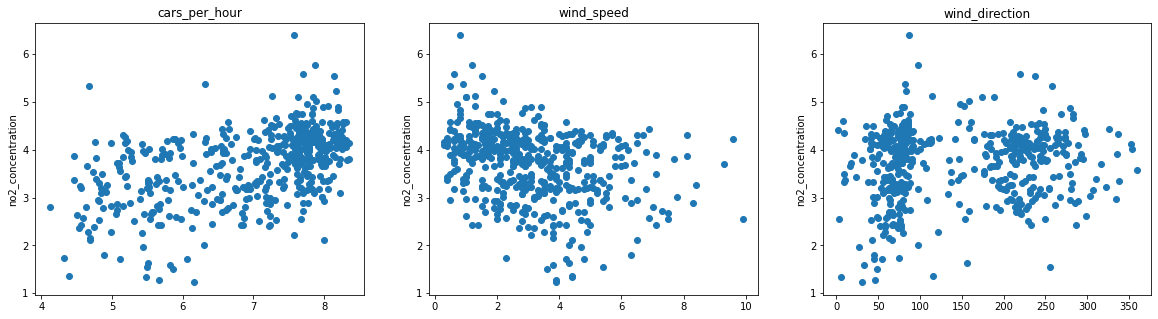

In [3]:
# plot the data
columns = list(dataset.columns)
columns.remove('no2_concentration')
fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))
for idx, col in enumerate(columns, 0):
    ax[idx].plot(dataset[col],dataset['no2_concentration'], 'o')
    ax[idx].set_ylabel('no2_concentration')
    ax[idx].set_title(col)
plt.show()

In [4]:
# split the separate test set
data   = dataset.drop('no2_concentration', axis=1).values
labels = dataset.no2_concentration
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.2, random_state=10)
train_y = train_y.values
test_y = test_y.values

In [5]:
def phi(input_data):
    ones_row = np.atleast_2d(np.ones(input_data.shape[0]))
    design_matrix = np.vstack([ones_row, input_data.T])
    return design_matrix

In [6]:
def regression(design_matrix, outcomes):
    left_side = design_matrix.T@design_matrix
    right_side = design_matrix.T@outcomes
    beta_vector = np.linalg.solve(left_side, right_side) 
    return beta_vector

In [7]:
def evaluate_MSE(predictions, truths):
    if len(predictions) != len(truths):
        raise ValueError(f'Mismatch between shape of predictions '
                         f'(length {len(predictions)}) and shape of '
                         f'truths (length {len(truths)})')
    RSS = 0
    nr_samples = len(predictions)
    for i in range(nr_samples):
        RSS += (truths[i] - predictions[i])**2
    MSE = RSS / nr_samples
    return MSE

In [8]:
design_matrix = phi(train_X)
beta_vector = regression(design_matrix.T, train_y)
predictions_train = phi(train_X).T@beta_vector 
predictions_test  = phi(test_X).T@beta_vector
MSE_train = evaluate_MSE(predictions_train, train_y)
MSE_test  = evaluate_MSE(predictions_test, test_y)

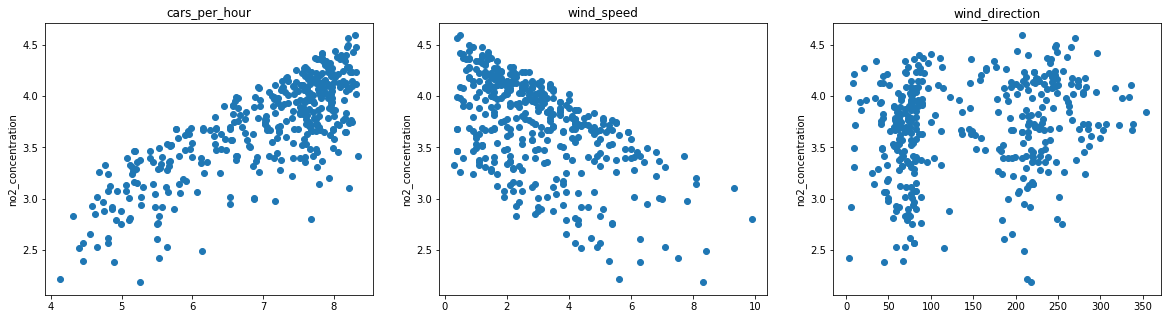

In [9]:
# plot on the train set the relationship between each attribute and
# the corresponding predictions ˆy from the regression model according
# to the regression parameter β.
columns = list(dataset.columns)
columns.remove('no2_concentration')
fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))
count = 0
for idx, col in enumerate(columns, 0):
    # ax[idx].plot(dataset[col],dataset['no2_concentration'], 'o')
    ax[idx].plot([item[count] for item in train_X], predictions_train, 'o')
    count = count + 1
    ax[idx].set_ylabel('no2_concentration')
    ax[idx].set_title(col)
plt.show()

In [10]:
print('Option A: prediction most susceptible to noise in last feature?')
print(beta_vector)
print('False - The beta of wind_direction is the smallest.')

Option A: prediction most susceptible to noise in last feature?
[ 1.62876837e+00  3.67943901e-01 -1.65784385e-01 -2.77279883e-05]
False - The beta of wind_direction is the smallest.


In [11]:
print('Option B: Predicted model suffers from overfitting?')
print(f'Train MSE = {MSE_train} | Test MSE = {MSE_test}')
print('False - MSE_train ~= MSE_test ==> no overfitting')

Option B: Predicted model suffers from overfitting?
Train MSE = 0.33550514402450365 | Test MSE = 0.32738771572597775
False - MSE_train ~= MSE_test ==> no overfitting


In [12]:
print('Option C: MSE on test is 0.327 (rounded)?')
print(f'Test MSE (rounded) = {round(MSE_test, 3)} == 0.327?')
print('True - Indeed it is!')

Option C: MSE on test is 0.327 (rounded)?
Test MSE (rounded) = 0.327 == 0.327?
True - Indeed it is!


In [13]:
print('Option D: Value of (rounded) intercept beta_0 is 0.368?')
print(f'Value of intercept (rounded) is {round(beta_vector[0], 3)}')
print('False - Closer to 5x that.')

Option D: Value of (rounded) intercept beta_0 is 0.368?
Value of intercept (rounded) is 1.629
False - Closer to 5x that.


In conclusion: the correct answer is **option C**.

# Question 2 - C

In [14]:
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly4 = PolynomialFeatures(4)

In [15]:
# Compute the design matrices using PolynomialFeatures
degree_2_data_train = poly2.fit_transform(train_X)
degree_3_data_train = poly3.fit_transform(train_X)
degree_4_data_train = poly4.fit_transform(train_X)

degree_2_data_test = poly2.fit_transform(test_X)
degree_3_data_test = poly3.fit_transform(test_X)
degree_4_data_test = poly4.fit_transform(test_X)

In [16]:
# Compute beta
degree_2_betas  = regression(degree_2_data_train, train_y)
degree_3_betas  = regression(degree_3_data_train, train_y)
degree_4_betas  = regression(degree_4_data_train, train_y)

In [17]:
# Use beta vectors to make predictions on train & test sets
degree_2_predictions_train = degree_2_data_train@degree_2_betas
degree_3_predictions_train = degree_3_data_train@degree_3_betas
degree_4_predictions_train = degree_4_data_train@degree_4_betas

degree_2_predictions_test = degree_2_data_test@degree_2_betas
degree_3_predictions_test = degree_3_data_test@degree_3_betas
degree_4_predictions_test = degree_4_data_test@degree_4_betas

In [18]:
degree_2_MSE_train = evaluate_MSE(degree_2_predictions_train, train_y)
degree_2_MSE_test = evaluate_MSE(degree_2_predictions_test, test_y)

degree_3_MSE_train = evaluate_MSE(degree_3_predictions_train, train_y)
degree_3_MSE_test = evaluate_MSE(degree_3_predictions_test, test_y)

degree_4_MSE_train = evaluate_MSE(degree_4_predictions_train, train_y)
degree_4_MSE_test = evaluate_MSE(degree_4_predictions_test, test_y)

In [19]:
print('Option A: Polynomial degree 3 suffers from underfitting?')
print(f'Train MSE deg 3 = {degree_3_MSE_train} | '\
      f'Test MSE deg 3 = {degree_3_MSE_test}')
print("False - This suggests more overfitting than underfitting, since test MSE > train MSE")

Option A: Polynomial degree 3 suffers from underfitting?
Train MSE deg 3 = 0.2776154925874182 | Test MSE deg 3 = 0.35158265498063657
False - This suggests more overfitting than underfitting, since test MSE > train MSE


In [20]:
print('Option B: Polynomial degree 4 is a good fit for the data?')
print(f'Test MSE deg 2 = {degree_2_MSE_test}')
print(f'Test MSE deg 3 = {degree_3_MSE_test}')
print(f'Train MSE deg 4 = {degree_4_MSE_train} | '\
      f'Test MSE deg 4 = {degree_4_MSE_test}')
print('False - degree 2 test accuracy is better, so 4 is definitely not the best fit we can get')

Option B: Polynomial degree 4 is a good fit for the data?
Test MSE deg 2 = 0.29573719515337715
Test MSE deg 3 = 0.35158265498063657
Train MSE deg 4 = 0.26584546947914695 | Test MSE deg 4 = 0.31913063532216546
False - degree 2 test accuracy is better, so 4 is definitely not the best fit we can get


In [21]:
print('Option C: MSE test degree 2 < MSE test degree 3?')
print(f'Test MSE deg 2 = {degree_2_MSE_test}')
print(f'Test MSE deg 3 = {degree_3_MSE_test}')
print('True - 0.295 < 0.312 indeed')

Option C: MSE test degree 2 < MSE test degree 3?
Test MSE deg 2 = 0.29573719515337715
Test MSE deg 3 = 0.35158265498063657
True - 0.295 < 0.312 indeed


In [22]:
print('Option D: Predicted NO2 by degree 2 on specific data == 3.171?')
specific_data = pd.DataFrame(data={'cars_per_hour':[6],
                                   'wind_speed':[3],
                                   'wind_direction':[100]}).values
specific_prediction = poly2.fit_transform(specific_data)@degree_2_betas
print(f'Is {specific_prediction[0]} == 3.171?')
print('False - 3.186 != 3.171')

Option D: Predicted NO2 by degree 2 on specific data == 3.171?
Is 3.1857188696249845 == 3.171?
False - 3.186 != 3.171


In conclusion, after checking all answers we find that **answer C** is correct.

# Question 3 - MC except not
$f^*(2) =-2+1=-1$

$F_{D_{1}}(2) = -2 * 2 + 0.6  = -4 + 0.6 = -3.4$

$F_{D_{2}}(2) = -1.4 * 2 +0.4 = -2.8 + 0.4 = -2.4$

$F_{D_{3}}(2) = -2 * 2 + 0.8  = -4 + 0.8 = -3.2$

Sample mean estimate of $\mathbb{E}_D[f_D(2)]$: $\frac{1}{3}(-3.4-2.4-3.2)=-3$

$bias^2(2) = (f^*(2)-\mathbb{E}_D[f_D(2)])^2 = (-1 + 3)^2 $

**bias^2 = 4**

$variance(2) = \mathbb{E}_D[(\mathbb{E}_D[f_D(2)]-f_D(2))^2]$

$=\frac{1}{3}*((-3+3.4)^2+(-3+2.4)^2+(-3+3.2)^2)$

$=\frac{1}{3}*(0.16+0.36+0.04)$

$=\frac{1}{3}*0.56$

**variance(2) ~= 0.19** (0.1866666...)

# Question 4 - B

Assuming that this data is generated using a continuous function from R^D to R^O, option B is true by the universal approximation theorem on slide 23 of the Neural Network I slide deck.

Notice that 0 training error could be achieved here by modelling a polynomial function, which are indeed continuous.

# Question 5 - C

To make all of the numbers work with the diagram, you get the following model architecture:
- Input: 1@64x64
- Convolution: Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1, padding = 0)
- Layer: 6@62x62
- Max-pooling: MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
- Layer: 6@31x31
- Flattening layer
- Dense layer: 4 neurons
- 2 Output neurons


**The size $(O)$ of the output image of a Conv Layer or a Maxpooling Layer:**

*$O$ = size of the output image*

*$I$ = size of the input image*

*$K$ = size of the kernel used in the Conv Layer*

*$N$ = the number kernels.(The output channel, not the RGB channels)*

*$S$ = stride of the convolution operation.*

*$P$ = padding*

\begin{align}
        O = \frac{I-K+2P}{S}+1
\end{align}

**The Number of Parameters of a Conv Layer:**

*$W_c$ = Number of weights of the Conv Layer.*

*$B_c$ = Number of biases of the Conv Layer.*

*$P_c$ = Number of parameters of the Conv Layer.*

*$K$ = Size (width) of kernels used in the Conv Layer.*

*$N$ = Number of kernels.*

*$C$ = Number of channels of the input image.*

\begin{align}
        W_c &= K^2 \times C \times N \\
        B_c &= N \\
        P_c &= W_c + B_c
\end{align}

**The number of Parameters of a MaxPool Layer:**
There are no parameters associated with a MaxPool layer. The pool size, stride, and padding are hyperparameters.

**Number of Parameters of a Fully Connected (FC) Layer connected to a Conv Layer:**
*$W_{cf}$ = Number of weights of a FC Layer which is connected to a Conv Layer.*

*$B_{cf}$ = Number of biases of a FC Layer which is connected to a Conv Layer.*

*$O$ = Size (width) of the output image of the **previous** Conv Layer.*

*$N$ = Number of kernels in the previous Conv Layer.*

*$F$ = Number of neurons in the FC Layer.*

\begin{align}
        W_{cf} &= O^2 \times N \times F \\
        B_{cf} &= F \\
        P_{cf} &= W_{cf} + B_{cf}
\end{align}

**The number of Parameters of a Fully Connected (FC) Layer connected to a FC Layer:**
*$W_{ff}$ = Number of weights of a FC Layer which is connected to an FC Layer.*

*$B_{ff}$ = Number of biases of a FC Layer which is connected to an FC Layer.*

*$P_{ff}$ = Number of parameters of a FC Layer which is connected to an FC Layer.*

*$F$ = Number of neurons in the FC Layer.*

*$F_{-1}$ = Number of neurons in the previous FC Layer.*

\begin{align}
        W_{ff} &= F_{-1} \times F \\
        B_{ff} &= F \\
        P_{ff} &= W_{ff} + B_{ff}
\end{align}

A: Wrong. The width of the kernel in layer S2 is 2.

B: Wrong. The number of the feature maps in layer S2 is 6 since Maxpooling is used on each channel of the input.

C: Correct. $W_{cf} = 31 \times 31 \times 6 \times 4 = 23064$, $B_{cf} = 4$, $P_{cf} = W_{cf} + B_{cf} = 23068$

D: Wrong. It should be $23138$.

$P_c = W_c + B_c = 3\times 3\times1\times6+6 = 60$

$P_{cf} = W_{cf} + B_{cf} = 4\times 2+2 = 10$

$P_{net} = P_{c}+P_{cf}+P_{ff} = 60+10+23068 = 23138$